In [1]:
import control 
import numpy as np 
import matplotlib.pyplot as plt
import pyfirmata
import time
import pandas as pd


In [4]:
#https://realpython.com/arduino-python/
#pip install pyfirmata
#### --------------------------- CHECKING CODE --------------------------------

board = pyfirmata.Arduino('/dev/ttyACM0')
idPwm = 8;
while True:
    board.digital[idPwm].write(1)
    time.sleep(1)
    board.digital[idPwm].write(0)
    time.sleep(1)

KeyboardInterrupt: 

In [5]:
board.digital[idPwm].write(0)

In [ ]:

#### --------------------------- AUFGABE 1: LESEN  -------------------------------
idAnalogue = 0;
idPwm = 8;
# 10 Bits - Analog to digital converter: 2^10 
A2D_v = 5;
flgStart = 1;
Ts = 0.02;
idxTimer = 0; 
Tab_val = [0];
Tab_time = [0];
uControl = [0];

it = pyfirmata.util.Iterator(board)
it.start()
potentiometer = board.analog[idAnalogue]
potentiometer.enable_reporting()

board.digital[idPwm].write(uControl)
time.sleep(1)

while flgStart == 1:
        u = 1;
        board.digital[idPwm].write(u)
        valRaw = potentiometer.read();
        print(valRaw)
        val = valRaw * A2D_v;
        
        time.sleep(Ts)
        idxTimer = idxTimer + 1;
        Tab_val.append(val);
        uControl.append(5*u);
        Tab_time.append(idxTimer*Ts);

        if idxTimer == Ts*3000:
            flgStart = 0; 
    

In [ ]:
plt.plot(Tab_time,Tab_val,'x',linewidth = 2, markersize=12,label='y')
plt.plot(Tab_time,uControl,'r',linewidth = 2,label='uControl')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude [V]')
plt.grid()
plt.legend()
plt.show()

In [6]:

#### --------------------------- AUFGABE 1: LESEN  -------------------------------
idAnalogue = 0;
idPwm = 8;
# 10 Bits - Analog to digital converter: 2^10 
A2D_v = 5;
flgStart = 1;
Ts = 0.02;
idxTimer = 0; 
Tab_val = [0];
Tab_time = [0];
uControl = [0];

it = pyfirmata.util.Iterator(board)
it.start()
potentiometer = board.analog[idAnalogue]
potentiometer.enable_reporting()

board.digital[idPwm].write(uControl)
time.sleep(1)

while flgStart == 1:

        if idxTimer < 4000*Ts or (idxTimer > 2*4000*Ts and idxTimer < 3*4000*Ts):
            u = 1;
        else:
            u = 0;

        board.digital[idPwm].write(u)
        valRaw = potentiometer.read();
        print(valRaw)
        val = valRaw * A2D_v;
        
        time.sleep(Ts)
        idxTimer = idxTimer + 1;
        Tab_val.append(val);
        uControl.append(5*u);
        Tab_time.append(idxTimer*Ts);

        if idxTimer == Ts*4000*4:
            flgStart = 0; 
    

0.0
0.0674
0.1711
0.2659
0.3451
0.4174
0.4829
0.5357
0.5855
0.6295
0.6676
0.7019
0.7605
0.7859
0.8074
0.826
0.8446
0.8592
0.8739
0.8856
0.8964
0.9062
0.9169
0.9238
0.9296
0.9384
0.9433
0.9482
0.958
0.9599
0.9648
0.9687
0.9707
0.9726
0.9746
0.9775
0.9795
0.9814
0.9824
0.9824
0.9844
0.9873
0.9873
0.9883
0.9883
0.9892
0.9912
0.9912
0.9922
0.9912
0.9922
0.9932
0.9932
0.9932
0.9941
0.9951
0.9941
0.9951
0.9951
0.9971
0.9941
0.9971
0.9961
0.9951
0.9971
0.9961
0.9971
0.9961
0.9971
0.9961
0.9971
0.9971
0.998
0.9961
0.9961
0.9961
0.9961
0.9971
0.9971
0.9971
0.9971
0.9453
0.8407
0.7439
0.6588
0.5894
0.5239
0.4682
0.3724
0.3324
0.2991
0.2649
0.2366
0.2141
0.1906
0.1711
0.1525
0.1369
0.1222
0.1105
0.0978
0.089
0.0792
0.0655
0.0577
0.0518
0.0459
0.043
0.0381
0.0342
0.0303
0.0274
0.0264
0.0235
0.0205
0.0176
0.0156
0.0156
0.0127
0.0108
0.0088
0.0108
0.0088
0.0068
0.0059
0.0059
0.0049
0.0049
0.0049
0.0039
0.0039
0.002
0.002
0.0029
0.002
0.002
0.0029
0.001
0.002
0.001
0.0
0.002
0.0
0.0
0.002
0.001
0.0
0

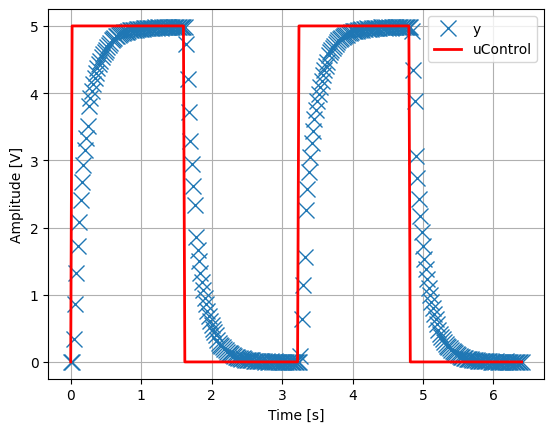

In [7]:
plt.plot(Tab_time,Tab_val,'x',linewidth = 2, markersize=12,label='y')
plt.plot(Tab_time,uControl,'r',linewidth = 2,label='uControl')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude [V]')
plt.grid()
plt.legend()
plt.show()

In [8]:
SimpleDataFrame=pd.DataFrame(data=Tab_val)
print(SimpleDataFrame)
 
# Exporting data frame to a csv/Excel file
# Many other options are available which can be seen using dot tab option
 
# Exporting data as a csv file
SimpleDataFrame.to_csv('/home/traximus/Schreibtisch/Development/02_GitHub/Traximus27.github.io/Arduino/SimpleDataFrame.csv')
 
# Exporting data as a excel file
SimpleDataFrame.to_excel('/home/traximus/Schreibtisch/Development/02_GitHub/Traximus27.github.io/Arduino/SimpleDataFrameExcel.xlsx')

          0
0    0.0000
1    0.0000
2    0.3370
3    0.8555
4    1.3295
..      ...
316  0.0000
317  0.0050
318  0.0050
319  0.0050
320  0.0000

[321 rows x 1 columns]


In [ ]:
pip install openpyxl